Learning Curve
===========

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
dataset = pd.read_csv('./unified.csv')

In [4]:
features = [
    'Estacao',
    'TempMaxima',
    'TempMinima',
    'Insolacao',
    'Evaporacao_Piche',
    'Temp_Comp_Media',
    'Umidade_Relativa_Media',
    'Velocidade_do_Vento_Media',
    'D1',
    'D2',
    'D3',
    'D4'
]

target = ['Precipitacao']

In [13]:
model = svm.SVC(kernel='rbf', C=10, class_weight='balanced', gamma='auto')

In [6]:
sc = StandardScaler()
x_data = sc.fit_transform(dataset[features])

/home/gustavo/anaconda3/envs/prototipo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

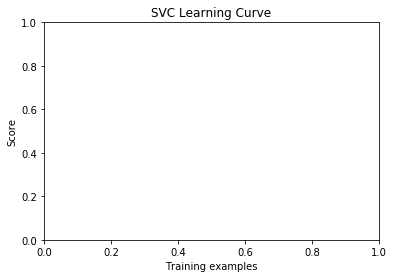

In [23]:
plot_learning_curve(
    estimator=model, 
    title='SVC Learning Curve',
    X=dataset[features],
    y=dataset[target],
    n_jobs=-1,
    train_sizes=(.2, .5, .7, 1.0)
)

In [7]:
xgboost_model = XGBClassifier(
    objective='binary:logistic',
    verbosity=3,
    colsample_bytree=0.3, 
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10)

/home/gustavo/anaconda3/envs/prototipo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/home/gustavo/anaconda3/envs/prototipo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

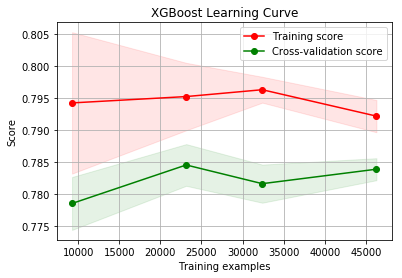

In [10]:
plot_learning_curve(
    estimator=xgboost_model,
    title='XGBoost Learning Curve',
    X=x_data,
    y=dataset[target],
    n_jobs=-1,
    train_sizes=(.2, .5, .7, 1.0)
)

In [9]:
plt.show()